<a href="https://colab.research.google.com/github/ArpanMahato99/ML-Lab/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.44099984],
       [3.54239929]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best) # y_predict = x * thetha
y_predict

array([[ 3.44099984],
       [10.52579842]])

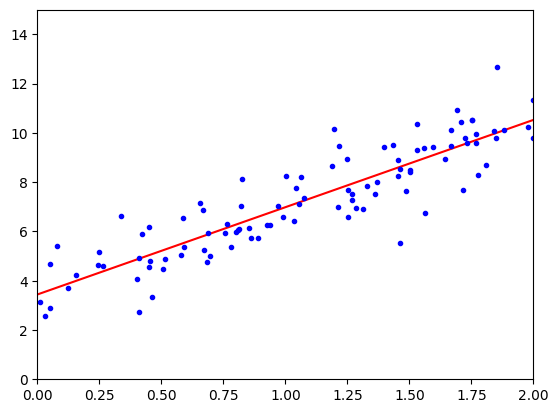

In [ ]:
from matplotlib import pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.44099984]), array([[3.54239929]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.44099984],
       [10.52579842]])

### Gradient Descent

In [ ]:
eta = 0.1 # learning rate
def gradient(eta = 0.1):
    n_iterations = 1000
    m = 100
    theta = np.random.randn(2,1) # random initialization
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        X_new = np.array([[0], [2]])
        X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, "b.")
        plt.axis([0, 2, 0, 15])
    plt.show()

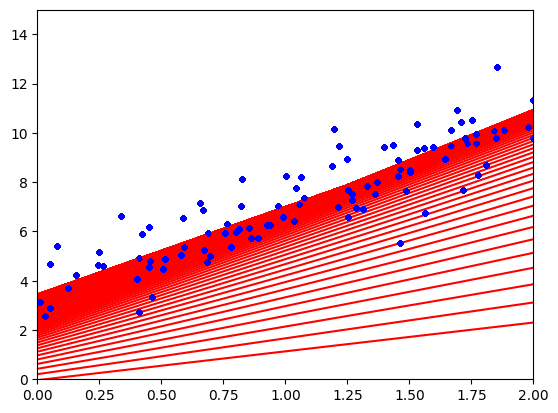

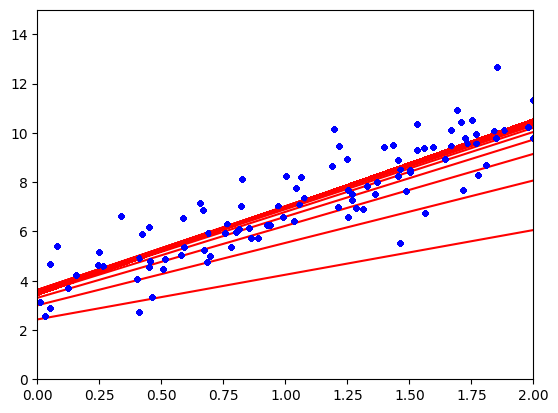

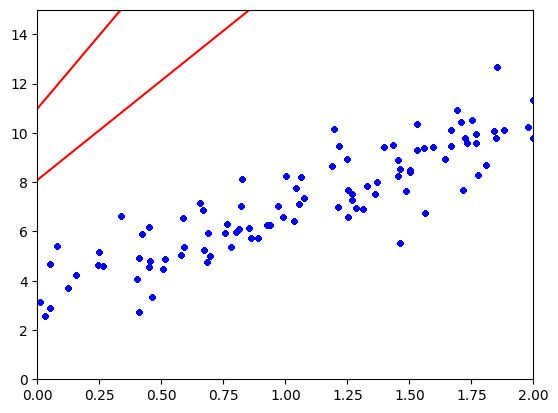

In [ ]:
eta_array = [0.02, 0.1, 0.5]
for eta in eta_array:
    gradient(eta)

### Stocahastic Gradient Descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50
n = 1000
m = 100

In [ ]:
def learning_schedule(t):
    return t0 / (t + t1)

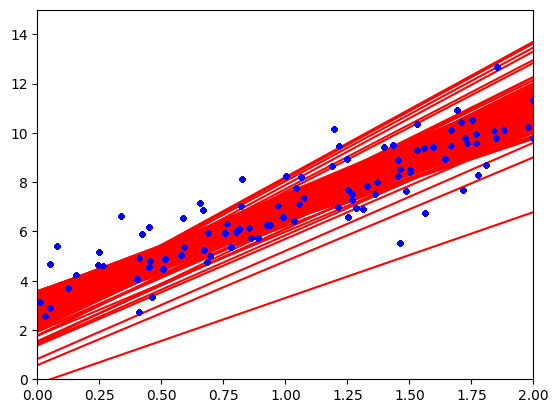

In [ ]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        X_new = np.array([[0], [2]])
        X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, "b.")
        plt.axis([0, 2, 0, 15])

In [ ]:
theta

array([[3.49423845],
       [3.50662095]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.38961999]), array([3.50757791]))

## Polynomial Regression

In [ ]:
m = 100
X= 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

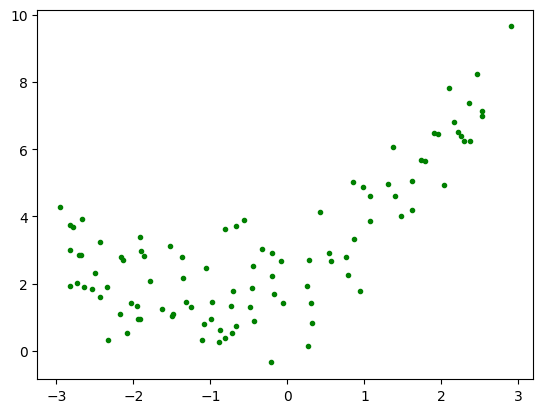

In [ ]:
plt.plot(X, y, "g." )
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.20926726e+00,  4.88086181e+00],
       [-7.15666376e-01,  5.12178362e-01],
       [-2.17471754e+00,  4.72939638e+00],
       [-1.49213406e+00,  2.22646406e+00],
       [ 9.82816645e-01,  9.65928557e-01],
       [-1.91183816e+00,  3.65512514e+00],
       [-1.05669093e+00,  1.11659572e+00],
       [-6.61821406e-01,  4.38007573e-01],
       [-2.66054030e+00,  7.07847468e+00],
       [-8.69059849e-01,  7.55265021e-01],
       [-4.82189706e-01,  2.32506912e-01],
       [-1.25762164e+00,  1.58161218e+00],
       [ 1.39499905e+00,  1.94602236e+00],
       [ 1.72883706e+00,  2.98887760e+00],
       [ 2.52899372e+00,  6.39580922e+00],
       [-7.32296087e-01,  5.36257559e-01],
       [-1.35059678e+00,  1.82411167e+00],
       [-8.85135188e-01,  7.83464301e-01],
       [ 2.29130994e+00,  5.25010123e+00],
       [-1.52334432e+00,  2.32057792e+00],
       [-1.37446017e+00,  1.88914077e+00],
       [-4.41357738e-01,  1.94796653e-01],
       [ 2.80572964e-01,  7.87211883e-02],
       [ 1.

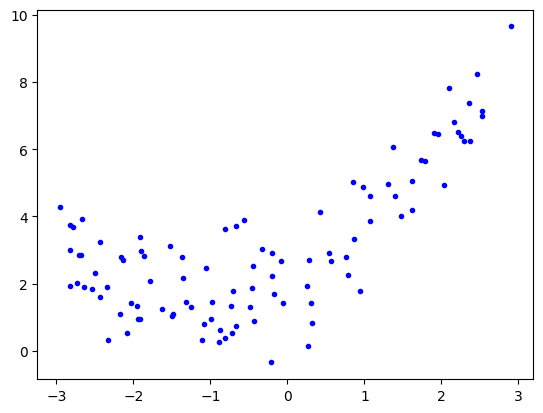

In [ ]:
plt.plot(X, y, "b." )
# plt.show()
# plt.plot(X_poly[:,0], X_poly[:,1],"r-")
plt.show()

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.06359728]), array([[1.0461552 , 0.47873575]]))

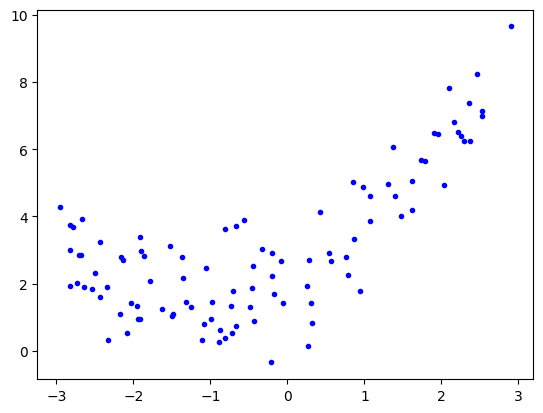

In [ ]:
plt.plot(X, y, "b." )
# plt.show()
plt.plot(lin_reg.intercept_, lin_reg.coef_,"r-")
plt.show()